In [1]:
import numpy as np
import matplotlib.pyplot as plt

n = 1000  
possible_means = np.array([0, 1, 2, 3])  
probabilities = np.array([(k + 1) / 10 for k in possible_means])  

# Генерація станів та нормальних випадкових величин
random_means = np.random.choice(possible_means, size=n, p=probabilities)
random_variables = np.random.normal(loc=random_means, scale=1, size=n)

In [2]:
def self_learning_algorithm_verbose(random_variables, tol=0.001, max_iter=100):
   
    ak = np.random.choice(possible_means, size=4)  
    pK = np.ones(4) / 4  

    previous_pK = np.zeros_like(pK)  
    iteration = 0  

    print(f"Initial ak: {ak}")
    print(f"Initial pK: {pK}\n")

    while np.any(np.abs(pK - previous_pK) > tol) and iteration < max_iter:
        iteration += 1
        previous_pK = pK.copy()

        # E-крок: обчислення відповідальностей (responsibilities)
        responsibilities = np.array([
            pK[k] * np.exp(-0.5 * (random_variables - ak[k])**2) / np.sqrt(2 * np.pi)
            for k in range(4)
        ])
        responsibilities /= responsibilities.sum(axis=0)  

        ak = np.sum(responsibilities * random_variables, axis=1) / np.sum(responsibilities, axis=1)
        pK = responsibilities.mean(axis=1)

        print(f"Iteration {iteration}")
        print(f"Updated ak: {ak}")
        print(f"Updated pK: {pK}")
        print(f"Change in pK: {np.abs(pK - previous_pK)}\n")

    return ak, pK

In [3]:
ak_estimates, pK_estimates = self_learning_algorithm_verbose(random_variables)

Initial ak: [0 3 3 1]
Initial pK: [0.25 0.25 0.25 0.25]

Iteration 1
Updated ak: [0.35377927 2.88469726 2.88469726 1.22607637]
Updated pK: [0.18958847 0.27613462 0.27613462 0.25814228]
Change in pK: [0.06041153 0.02613462 0.02613462 0.00814228]

Iteration 2
Updated ak: [0.40197192 2.84441686 2.84441686 1.26165158]
Updated pK: [0.18456247 0.27600973 0.27600973 0.26341807]
Change in pK: [0.005026   0.0001249  0.0001249  0.00527579]

Iteration 3
Updated ak: [0.40762565 2.83397825 2.83397825 1.27657536]
Updated pK: [0.18278254 0.27576604 0.27576604 0.26568537]
Change in pK: [0.00177994 0.00024368 0.00024368 0.0022673 ]

Iteration 4
Updated ak: [0.40339568 2.83120799 2.83120799 1.28578997]
Updated pK: [0.18180461 0.27543926 0.27543926 0.26731688]
Change in pK: [0.00097793 0.00032679 0.00032679 0.0016315 ]

Iteration 5
Updated ak: [0.39723149 2.83069937 2.83069937 1.29295997]
Updated pK: [0.18104705 0.27505091 0.27505091 0.26885113]
Change in pK: [0.00075756 0.00038835 0.00038835 0.00153426]

In [4]:
print("Final estimates:")
print(f"Estimated ak: {ak_estimates}")
print(f"Estimated pK: {pK_estimates}")

Final estimates:
Estimated ak: [-0.05697337  2.91874765  2.91874765  1.3241905 ]
Estimated pK: [0.09441753 0.24549756 0.24549756 0.41458735]


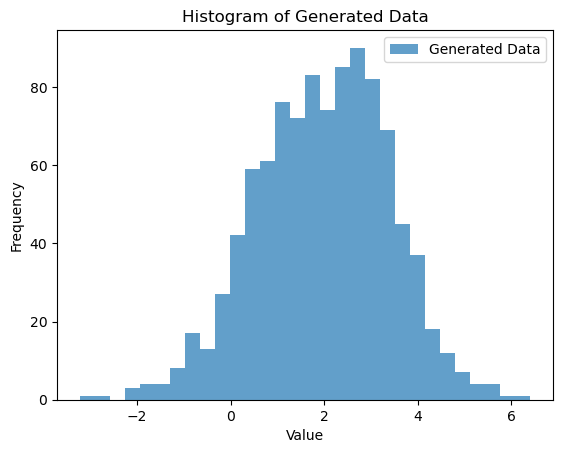

In [5]:
plt.hist(random_variables, bins=30, alpha=0.7, label="Generated Data")
plt.title("Histogram of Generated Data")
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.legend()
plt.show()